C:\Users\paula\AppData\Local\Temp\ipykernel_8632\397337873.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])  # Ajustar para que no se superponga con la barra de color


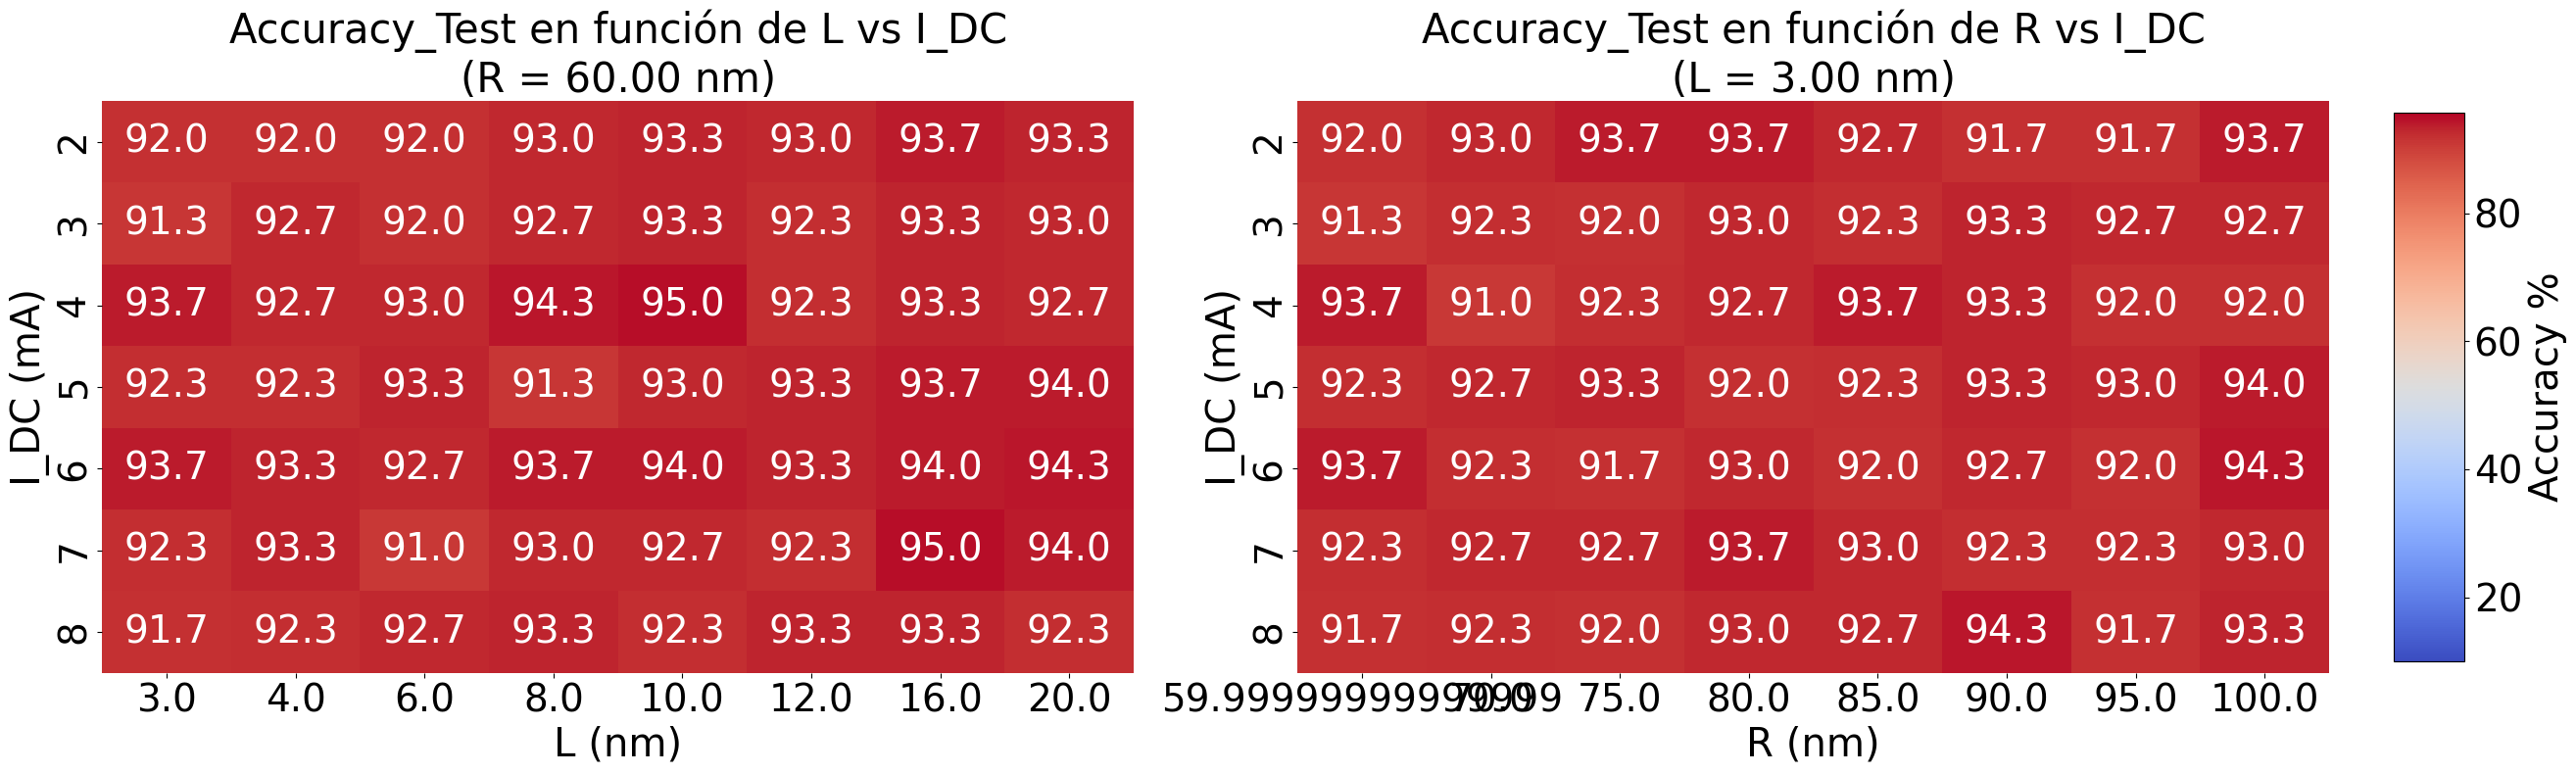

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Función para crear un heatmap a partir de un DataFrame filtrado
def create_heatmap(df, x, y, value, ax, title, vmin, vmax, xlabel, ylabel):
    heatmap_data = df.pivot_table(index=y, columns=x, values=value, aggfunc='mean')
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".1f",
        cmap="coolwarm",
        annot_kws={"fontsize": 28},
        ax=ax,
        cbar=False,  # Desactivar la barra de color individual
        vmin=vmin,
        vmax=vmax
    )
    ax.set_title(title, fontsize=30)
    ax.set_xlabel(xlabel, fontsize=29)
    ax.set_ylabel(ylabel, fontsize=29)

    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)


# Cargar el archivo CSV
df = pd.read_csv(r'C:\Users\paula\Desktop\RESULTS\UniformState\simulation_results_uniform_2.csv')

# Filtrar los datos donde rango_I_in == 4
df_filtered = df[df['rango_I_in'] == 4]

# Asegurarse de que Accuracy_Test está entre 0 y 1
df_filtered['Accuracy_Test'] = (df_filtered['Accuracy_Test'].clip(0, 1) * 100).round(1)

# Convertir L y R a nanómetros
df_filtered['L_nm'] = df_filtered['L'] * 1e9
df_filtered['R_nm'] = df_filtered['R'] * 1e9

# Convertir I_DC_Vortex a miliamperios

df_filtered['I_DC_Vortex_mA'] = np.floor(df_filtered['I_DC_Vortex'] * 1e3).astype(int)


# Seleccionar un valor específico de R para el gráfico L vs I_DC_Vortex_mA
selected_R = df_filtered['R'].unique()[0]  # Puedes cambiar este valor según necesites
df_L_vs_I = df_filtered[df_filtered['R'] == selected_R]

# Seleccionar un valor específico de L para el gráfico R vs I_DC_Vortex_mA
selected_L = df_filtered['L'].unique()[0]  # Puedes cambiar este valor según necesites
df_R_vs_I = df_filtered[df_filtered['L'] == selected_L]

# Crear una figura con 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Definir el mínimo y máximo para la barra de color
vmin = df_filtered['Accuracy_Test'].min()
vmax = df_filtered['Accuracy_Test'].max()

# Generar heatmap para L vs I_DC_Vortex_mA
create_heatmap(
    df=df_L_vs_I,
    x='L_nm',
    y='I_DC_Vortex_mA',
    value='Accuracy_Test',
    ax=axs[0],
    title=f'Accuracy_Test en función de L vs I_DC\n(R = {selected_R * 1e9:.2f} nm)',
    vmin=vmin,
    vmax=vmax,
    xlabel='L (nm)',
    ylabel='I_DC (mA)'
)

# Generar heatmap para R vs I_DC_Vortex_mA
create_heatmap(
    df=df_R_vs_I,
    x='R_nm',
    y='I_DC_Vortex_mA',
    value='Accuracy_Test',
    ax=axs[1],
    title=f'Accuracy_Test en función de R vs I_DC\n(L = {selected_L * 1e9:.2f} nm)',
    vmin=vmin,
    vmax=vmax,
    xlabel='R (nm)',
    ylabel='I_DC (mA)'
)

# Añadir una sola barra de color a la derecha de los gráficos
cbar_ax = fig.add_axes([1.02, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Accuracy %', fontsize=29)
cbar.ax.tick_params(labelsize=28)

plt.tight_layout(rect=[0, 0, 1, 1])  # Ajustar para que no se superponga con la barra de color
plt.show()




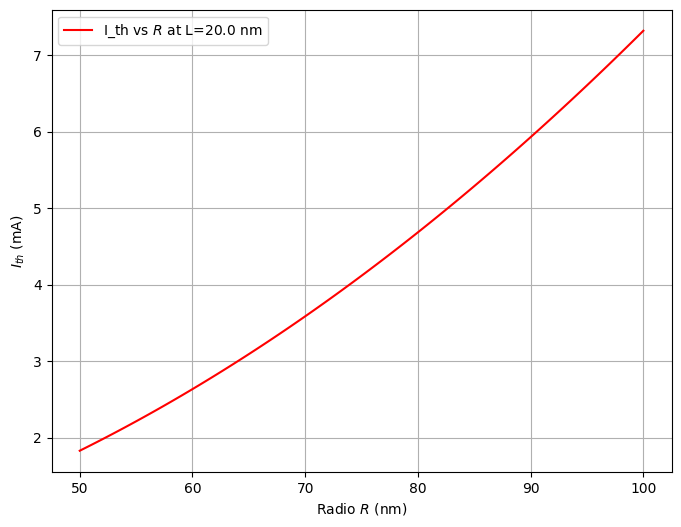

In [14]:
import numpy as np

import numpy as np
from scipy.constants import mu_0
import matplotlib.pyplot as plt

m_e = 9.1e-31

c = 0.02
gyro_ratio = -1.76e11 # Gyromagnetic ratio (1/Ts)
gyro_ratio_hz = -2.8e10 # Gyroratio (Hz/T)
alpha_g = 0.01 # Gilbert Damping Constant
aplied_field = 0.400 # Applied Field (Tesla)
saturation_magnetization = 0.73 # Saturation Magnetization (T)
saturation_magnetization_A_M = saturation_magnetization / mu_0
epsilon = 0.5 # Spin Polarization Efficiency
lande_factor = -2.002 # Electron Lande Factor 
bhor_magneton = 9.27e-24 # Bohr magneton (J/T)
e = -1.602e-19 # Electron Charge (C)
L = 20e-9

# Función para calcular I_th y T_relax
def Compute_I_th(L, R):
        omega_0 = gyro_ratio * (aplied_field -  saturation_magnetization)
        gama_g = alpha_g * omega_0
        sigma = (epsilon * lande_factor * bhor_magneton) / (2 * e * saturation_magnetization_A_M * L * (np.pi * (R ** 2)))
        I_th = gama_g / sigma
        return  I_th 




R_values = np.linspace(50e-9,100e-9,100)
I_th_values = np.array([Compute_I_th(L,R) for R in R_values]) *1e3

# plot 
plt.figure(figsize=(8,6))
plt.plot(R_values*1e9,I_th_values, label=f"I_th vs $R$ at L={L*1e9} nm" , color="red")
plt.xlabel('Radio $R$ (nm)')
plt.ylabel(r'$I_{th}$ (mA)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\paula\AppData\Local\Temp\ipykernel_8632\1668012582.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = (epsilon * lande_factor * bhor_magneton) / (2 * e * saturation_magnetization_A_M * L * (np.pi * (R ** 2)))


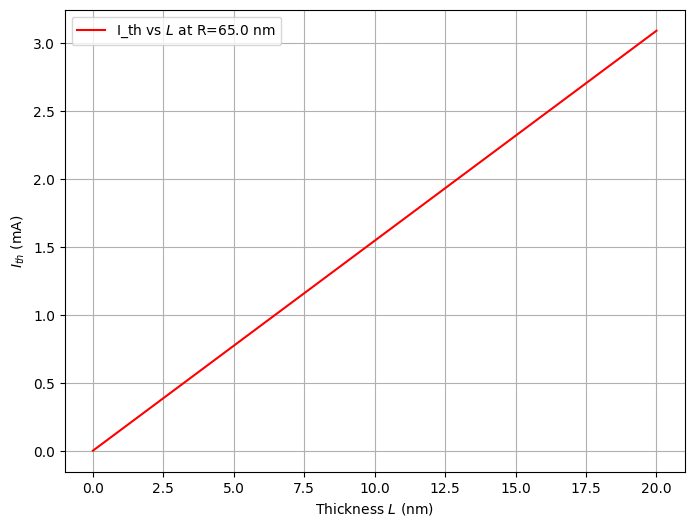

In [7]:
R = 65e-9

# Función para calcular I_th y T_relax
def Compute_I_th(L, R):
        omega_0 = gyro_ratio * (aplied_field -  saturation_magnetization)
        gama_g = alpha_g * omega_0
        sigma = (epsilon * lande_factor * bhor_magneton) / (2 * e * saturation_magnetization_A_M * L * (np.pi * (R ** 2)))
        I_th = gama_g / sigma
        return  I_th 




L_values = np.linspace(0e-9,20e-9,100)
I_th_values = np.array([Compute_I_th(L,R) for L in L_values]) *1e3

# plot 
plt.figure(figsize=(8,6))
plt.plot(L_values*1e9,I_th_values, label=f"I_th vs $L$ at R={R*1e9} nm" , color="red")
plt.xlabel('Thickness $L$ (nm)')
plt.ylabel(r'$I_{th}$ (mA)')
plt.legend()
plt.grid(True)
plt.show()



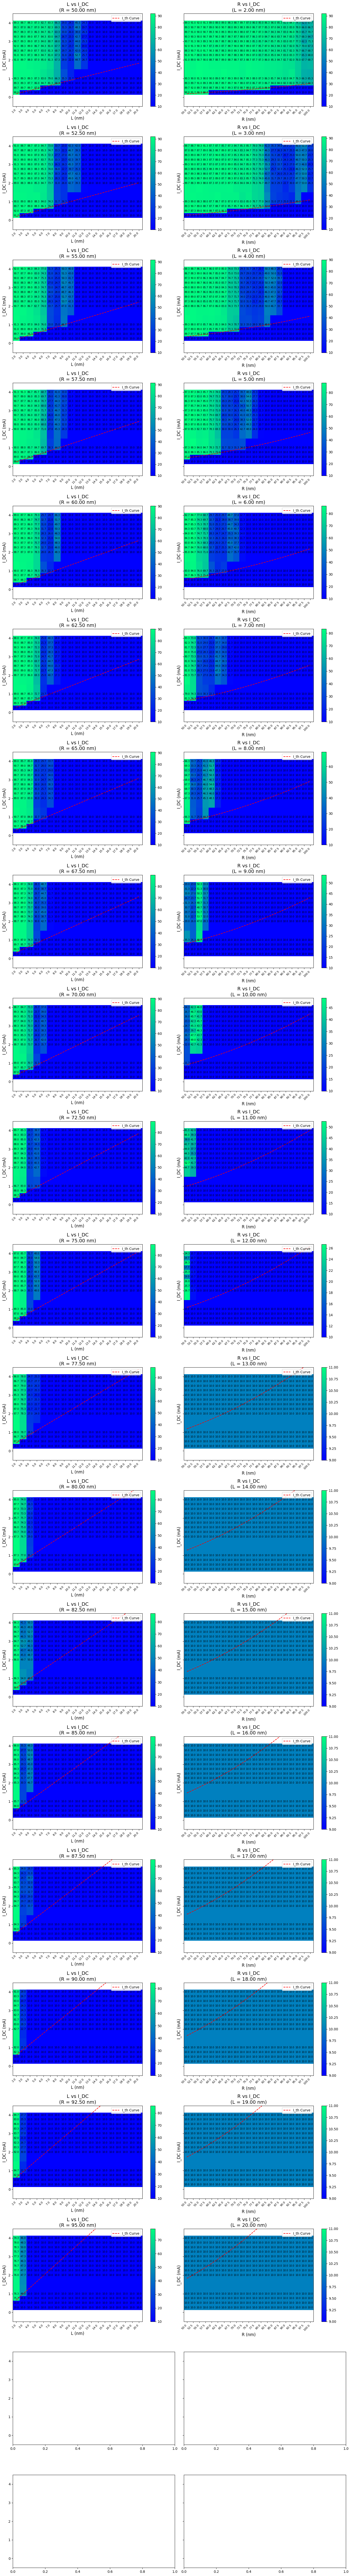

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

# Función para crear un heatmap utilizando pcolormesh y superponer la curva
def create_pcolormesh_with_curve(df, x, y, value, curve_x, curve_y, ax, title, xlabel, ylabel):
    # Crear la matriz para el heatmap
    heatmap_data = df.pivot_table(index=y, columns=x, values=value, aggfunc='mean').values
    x_labels = sorted(df[x].unique())
    y_labels = sorted(df[y].unique())
    
    # Mostrar el heatmap usando pcolormesh con shading='nearest'
    X, Y = np.meshgrid(x_labels, y_labels)
    cax = ax.pcolormesh(X, Y, heatmap_data, cmap="winter", shading='nearest', vmin=df[value].min(), vmax=df[value].max())
    
    # Añadir anotaciones en el heatmap
    for j in range(heatmap_data.shape[0]):
        for i in range(heatmap_data.shape[1]):
            cell_value = heatmap_data[j, i]
            if not np.isnan(cell_value):
                ax.text(x_labels[i], y_labels[j], f"{cell_value:.1f}", ha='center', va='center', fontsize=7, color="black")
    
    # Configurar etiquetas de los ejes
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    # Ajustar las etiquetas del eje x para que coincidan con los valores de x_labels
    ax.set_xticks(x_labels)
    ax.set_xticklabels([f"{label:.1f}" for label in x_labels], rotation=45, ha='right', fontsize=8)
    
    # Superponer la curva en el mismo gráfico
    ax.plot(curve_x, curve_y, color="red", linestyle="--", linewidth=1.5, label="I_th Curve")
    ax.legend(loc="upper right")
    plt.ylim(-0.5,4.5)
    # Añadir barra de color
    plt.colorbar(cax, ax=ax)

# Ruta de la carpeta de resultados
folder_path = r'C:\Users\paula\Desktop\RESULTS\UniformState\results'

# Leer todos los archivos CSV de la carpeta y concatenarlos en un solo DataFrame
all_files = glob.glob(os.path.join(folder_path, "*.csv"))
df_list = [pd.read_csv(file) for file in all_files]
df = pd.concat(df_list, ignore_index=True)

# Filtrar los datos donde rango_I_in == 4
df_filtered = df[df['rango_I_in'] == 4]

# Asegurarse de que Accuracy_Test está entre 0 y 1
df_filtered['Accuracy_Test'] = (df_filtered['Accuracy_Test'].clip(0, 1) * 100).round(1)

# Convertir L y R a nanómetros
df_filtered['L_nm'] = df_filtered['L'] * 1e9
df_filtered['R_nm'] = df_filtered['R'] * 1e9

# Convertir I_DC_Vortex a miliamperios
df_filtered['I_DC_Vortex_mA'] = (df_filtered['I_DC_Vortex'] * 1e3)

# Filtrar para excluir valores donde I_DC_Vortex_mA >= 9
df_filtered = df_filtered[df_filtered['I_DC_Vortex_mA'] < 9]

# Valores únicos de R y L
unique_R = sorted(df_filtered['R'].unique())
unique_L = sorted(df_filtered['L'].unique())

# Crear una figura con subplots para todos los valores únicos de R y L
fig, axs = plt.subplots(len(unique_R), 2, figsize=(16, len(unique_R) * 5), sharey=True)
plt.subplots_adjust(hspace=0.5)


# Iterar sobre los valores únicos de R y L para crear los heatmaps y curvas
for i, (r_val, l_val) in enumerate(zip(unique_R, unique_L)):

    # Filtrar por el valor de R
    df_L_vs_I = df_filtered[df_filtered['R'] == r_val]
    # Filtrar por el valor de L
    df_R_vs_I = df_filtered[df_filtered['L'] == l_val]

    # Generar puntos para la curva I_th en función de L
    L_values = np.linspace(2e-9, 20e-9, 100) * 1e9  # Convertir a nm
    I_th_values_L = np.array([Compute_I_th(L, r_val) for L in L_values / 1e9]) * 1e3  # Convertir a mA
    
    # Generar heatmap y superponer curva para L vs I_DC
    create_pcolormesh_with_curve(
        df=df_L_vs_I,
        x='L_nm',
        y='I_DC_Vortex_mA',
        value='Accuracy_Test',
        curve_x=L_values,
        curve_y=I_th_values_L,
        ax=axs[i, 0],
        title=f'L vs I_DC\n(R = {r_val * 1e9:.2f} nm)',
        xlabel='L (nm)',
        ylabel='I_DC (mA)'
    )
    
    # Generar puntos para la curva I_th en función de R
    R_values = np.linspace(50e-9, 100e-9, 100) * 1e9  # Convertir a nm
    I_th_values_R = np.array([Compute_I_th(l_val, R) for R in R_values / 1e9]) * 1e3  # Convertir a mA
    
    # Generar heatmap y superponer curva para R vs I_DC
    create_pcolormesh_with_curve(
        df=df_R_vs_I,
        x='R_nm',
        y='I_DC_Vortex_mA',
        value='Accuracy_Test',
        curve_x=R_values,
        curve_y=I_th_values_R,
        ax=axs[i, 1],
        title=f'R vs I_DC\n(L = {l_val * 1e9:.2f} nm)',
        xlabel='R (nm)',
        ylabel='I_DC (mA)'
    )

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

